**Do the codeing here**

So i will be creating the sections so you can add code  and you can perform the visualization

In [1]:
#Alex---u can keep on adding the code bock if required

In [2]:
#Liu

In [3]:
#Kp

Yathin Burugamakaalli shivanna

In [4]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import IPython.display as ipd
import networkx as nx
import mpld3

In [5]:
#Reading the Data File
#Authors_Data where it contains the authors name and afflication
#Articles_Data contains the area of the intrest,journal,articles.....

papercount_Data = pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\paper_counts.csv")
Authors_Data  = pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\authors.schistosomiasis.csv")
Articles_Data =  pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\articles.schistosomiasis.csv")
ipd.display(Authors_Data)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10543349,1,M,Divizia,M,"Department of Public Health, University of Tor..."
1,10543349,2,R,Gabrieli,R,NaN
2,10543349,3,M L,Stefanoni,ML,NaN
3,10543349,4,E,Renganathan,E,NaN
4,10543349,5,E,El Ghazzawi,E,NaN
...,...,...,...,...,...,...
60040,38095735,3,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ..."
60041,38095735,4,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ..."
60042,38095735,5,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ..."
60043,38095735,6,Justine Marie R,Molo,JMR,"Department of Biological Sciences, College of ..."


In [6]:
#In Authors Data AuthorsAffiliation is not filled
#Since consdering the same PMID we can do fillforward method to fill the Author afflilation
Authors_Data['AuthorAffiliation'] = Authors_Data['AuthorAffiliation'].ffill()
ipd.display(Authors_Data)


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10543349,1,M,Divizia,M,"Department of Public Health, University of Tor..."
1,10543349,2,R,Gabrieli,R,"Department of Public Health, University of Tor..."
2,10543349,3,M L,Stefanoni,ML,"Department of Public Health, University of Tor..."
3,10543349,4,E,Renganathan,E,"Department of Public Health, University of Tor..."
4,10543349,5,E,El Ghazzawi,E,"Department of Public Health, University of Tor..."
...,...,...,...,...,...,...
60040,38095735,3,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ..."
60041,38095735,4,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ..."
60042,38095735,5,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ..."
60043,38095735,6,Justine Marie R,Molo,JMR,"Department of Biological Sciences, College of ..."


In [7]:
#As mentioned, we will be consdering the Authors last name and the Autors initials as his full name

Authors_Data['Author Name'] =   Authors_Data['AuthorLastname'] +' '+ Authors_Data['AuthorInitials']

# Printing the updated DataFrame
ipd.display(Authors_Data)





,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Author Name
0,10543349,1,M,Divizia,M,"Department of Public Health, University of Tor...",Divizia M
1,10543349,2,R,Gabrieli,R,"Department of Public Health, University of Tor...",Gabrieli R
2,10543349,3,M L,Stefanoni,ML,"Department of Public Health, University of Tor...",Stefanoni ML
3,10543349,4,E,Renganathan,E,"Department of Public Health, University of Tor...",Renganathan E
4,10543349,5,E,El Ghazzawi,E,"Department of Public Health, University of Tor...",El Ghazzawi E
...,...,...,...,...,...,...,...
60040,38095735,3,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ...",Baldonado BMM
60041,38095735,4,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ...",Bilasano RNB
60042,38095735,5,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ...",Dullano SML
60043,38095735,6,Justine Marie R,Molo,JMR,"Department of Biological Sciences, College of ...",Molo JMR


In [8]:
#Dropping the coloumns of the Author forename ,lastname,initials
Authors_Data.drop(columns=['AuthorForename','AuthorLastname','AuthorInitials'],axis=1,inplace = True)
ipd.display(Authors_Data)
Authors_Data.to_csv(r"C:\Users\YATHIN REDDY\Desktop\author_Data_clean.csv", sep=',', index=False, encoding='utf-8')

,PMID,AuthorN,AuthorAffiliation,Author Name
0,10543349,1,"Department of Public Health, University of Tor...",Divizia M
1,10543349,2,"Department of Public Health, University of Tor...",Gabrieli R
2,10543349,3,"Department of Public Health, University of Tor...",Stefanoni ML
3,10543349,4,"Department of Public Health, University of Tor...",Renganathan E
4,10543349,5,"Department of Public Health, University of Tor...",El Ghazzawi E
...,...,...,...,...
60040,38095735,3,"Department of Biological Sciences, College of ...",Baldonado BMM
60041,38095735,4,"Department of Biological Sciences, College of ...",Bilasano RNB
60042,38095735,5,"Department of Biological Sciences, College of ...",Dullano SML
60043,38095735,6,"Department of Biological Sciences, College of ...",Molo JMR


In [9]:
#Displaying the Articles.csv

ipd.display(Articles_Data)

#So in this data First Author affiliation is given and along with the first names

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor..."
1,10548300,Relationship between circulating antigen level...,Ninety-eight Schistosoma mansoni-infected chil...,0002-9637,The American journal of tropical medicine and ...,(61) 635-8,1999,M M,Hassan,MM,"Department of Parasitology, Faculty of Medicin..."
2,10556825,Schistosoma mansoni schistosomula reduce E-sel...,The recruitment of immune cells into the lungs...,0014-2980,European journal of immunology,(29) 3691-701,1999,F,Trottein,F,"Centre d'Immunologie et de Biologie, Parasitai..."
3,10557147,The baboon as a non-human primate model of hum...,"Over the past three decades, intensive studies...",0169-4758,Parasitology today (Personal ed.),(15) 478-82,1999,M,Nyindo,M,"Kilimanjaro Christian Medical College (KCMC), ..."
4,10559846,Antigenic stimulation is more efficient than L...,Nitric oxide (NO) is an extremely important an...,0100-879X,Brazilian journal of medical and biological re...,(32) 1437-45,1999,D M,Oliveira,DM,"Departamento de Bioquímica e Imunologia, Insti..."
...,...,...,...,...,...,...,...,...,...,...,...
9299,38076323,Risk mapping and socio-ecological drivers of s...,The Philippines reports a high prevalence of s...,2666-6065,The Lancet regional health. Western Pacific,(43) 100974,2024,Tsheten,Tsheten,T,National Centre for Epidemiology and Populatio...
9300,38084940,Genetic difference between two Schistosoma jap...,Schistosoma japonicum is one of the major infe...,1776-1042,"Parasite (Paris, France)",(30) 59,2023,Hui-Ying,Sun,HY,"Department of Epidemiology and Statistics, Sch..."
9301,38086267,Matrix metalloproteinases inhibition reveals t...,Schistosomiasis mansoni is a parasitic infecti...,1878-1705,International immunopharmacology,(127) 111353,2023,Thiago D,Silva,TD,Programa de Pós-Graduação em Biociências Aplic...
9302,38093363,Exploring the immune interactions between Onco...,"Schistosomiasis, the second largest parasitic ...",1756-3305,Parasites & vectors,(16) 453,2023,Hongyu,Li,H,"Shulan International Medical College, Zhejiang..."


In [10]:
#Getting the author name by combining the AuthorLastname and the AutorInitials

Articles_Data['Author Name'] = Articles_Data['FirstAuthorLastname'] +' '+Articles_Data['FirstAuthorInitials'] 
ipd.display(Articles_Data)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,Author Name
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",Divizia M
1,10548300,Relationship between circulating antigen level...,Ninety-eight Schistosoma mansoni-infected chil...,0002-9637,The American journal of tropical medicine and ...,(61) 635-8,1999,M M,Hassan,MM,"Department of Parasitology, Faculty of Medicin...",Hassan MM
2,10556825,Schistosoma mansoni schistosomula reduce E-sel...,The recruitment of immune cells into the lungs...,0014-2980,European journal of immunology,(29) 3691-701,1999,F,Trottein,F,"Centre d'Immunologie et de Biologie, Parasitai...",Trottein F
3,10557147,The baboon as a non-human primate model of hum...,"Over the past three decades, intensive studies...",0169-4758,Parasitology today (Personal ed.),(15) 478-82,1999,M,Nyindo,M,"Kilimanjaro Christian Medical College (KCMC), ...",Nyindo M
4,10559846,Antigenic stimulation is more efficient than L...,Nitric oxide (NO) is an extremely important an...,0100-879X,Brazilian journal of medical and biological re...,(32) 1437-45,1999,D M,Oliveira,DM,"Departamento de Bioquímica e Imunologia, Insti...",Oliveira DM
...,...,...,...,...,...,...,...,...,...,...,...,...
9299,38076323,Risk mapping and socio-ecological drivers of s...,The Philippines reports a high prevalence of s...,2666-6065,The Lancet regional health. Western Pacific,(43) 100974,2024,Tsheten,Tsheten,T,National Centre for Epidemiology and Populatio...,Tsheten T
9300,38084940,Genetic difference between two Schistosoma jap...,Schistosoma japonicum is one of the major infe...,1776-1042,"Parasite (Paris, France)",(30) 59,2023,Hui-Ying,Sun,HY,"Department of Epidemiology and Statistics, Sch...",Sun HY
9301,38086267,Matrix metalloproteinases inhibition reveals t...,Schistosomiasis mansoni is a parasitic infecti...,1878-1705,International immunopharmacology,(127) 111353,2023,Thiago D,Silva,TD,Programa de Pós-Graduação em Biociências Aplic...,Silva TD
9302,38093363,Exploring the immune interactions between Onco...,"Schistosomiasis, the second largest parasitic ...",1756-3305,Parasites & vectors,(16) 453,2023,Hongyu,Li,H,"Shulan International Medical College, Zhejiang...",Li H


In [11]:
#Dropping the coloumns of the names like lastname,forename and initials
Articles_Data.drop(columns=['FirstAuthorForename','FirstAuthorLastname','FirstAuthorInitials'],axis=1,inplace = True)
ipd.display(Articles_Data)

#Exporting the Articles Data
Articles_Data.to_csv(r"C:\Users\YATHIN REDDY\Desktop\articles_Data_clean.csv", sep=',', index=False, encoding='utf-8')

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorAffiliation,Author Name
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M
1,10548300,Relationship between circulating antigen level...,Ninety-eight Schistosoma mansoni-infected chil...,0002-9637,The American journal of tropical medicine and ...,(61) 635-8,1999,"Department of Parasitology, Faculty of Medicin...",Hassan MM
2,10556825,Schistosoma mansoni schistosomula reduce E-sel...,The recruitment of immune cells into the lungs...,0014-2980,European journal of immunology,(29) 3691-701,1999,"Centre d'Immunologie et de Biologie, Parasitai...",Trottein F
3,10557147,The baboon as a non-human primate model of hum...,"Over the past three decades, intensive studies...",0169-4758,Parasitology today (Personal ed.),(15) 478-82,1999,"Kilimanjaro Christian Medical College (KCMC), ...",Nyindo M
4,10559846,Antigenic stimulation is more efficient than L...,Nitric oxide (NO) is an extremely important an...,0100-879X,Brazilian journal of medical and biological re...,(32) 1437-45,1999,"Departamento de Bioquímica e Imunologia, Insti...",Oliveira DM
...,...,...,...,...,...,...,...,...,...
9299,38076323,Risk mapping and socio-ecological drivers of s...,The Philippines reports a high prevalence of s...,2666-6065,The Lancet regional health. Western Pacific,(43) 100974,2024,National Centre for Epidemiology and Populatio...,Tsheten T
9300,38084940,Genetic difference between two Schistosoma jap...,Schistosoma japonicum is one of the major infe...,1776-1042,"Parasite (Paris, France)",(30) 59,2023,"Department of Epidemiology and Statistics, Sch...",Sun HY
9301,38086267,Matrix metalloproteinases inhibition reveals t...,Schistosomiasis mansoni is a parasitic infecti...,1878-1705,International immunopharmacology,(127) 111353,2023,Programa de Pós-Graduação em Biociências Aplic...,Silva TD
9302,38093363,Exploring the immune interactions between Onco...,"Schistosomiasis, the second largest parasitic ...",1756-3305,Parasites & vectors,(16) 453,2023,"Shulan International Medical College, Zhejiang...",Li H


In [12]:
#Merging the Articles data and Author data through the PMID


Authors_Articles_Data = Articles_Data.merge(Authors_Data , on="PMID" )
print("Merging the Data")
ipd.display(Authors_Articles_Data)

Authors_Articles_Data.to_csv(r"C:\Users\YATHIN REDDY\Desktop\arctiles_authors_clean.csv", sep=',', index=False, encoding='utf-8')

#So here we can see the people whom is workong with whom in Author Name_x and Author Name_y 

Merging the Data


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorAffiliation,Author Name_x,AuthorN,AuthorAffiliation,Author Name_y
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M,1,"Department of Public Health, University of Tor...",Divizia M
1,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M,2,"Department of Public Health, University of Tor...",Gabrieli R
2,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M,3,"Department of Public Health, University of Tor...",Stefanoni ML
3,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M,4,"Department of Public Health, University of Tor...",Renganathan E
4,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,"Department of Public Health, University of Tor...",Divizia M,5,"Department of Public Health, University of Tor...",El Ghazzawi E
...,...,...,...,...,...,...,...,...,...,...,...,...
60078,38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,"Department of Biological Sciences, College of ...",Recopuerto-Medina LM,3,"Department of Biological Sciences, College of ...",Baldonado BMM
60079,38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,"Department of Biological Sciences, College of ...",Recopuerto-Medina LM,4,"Department of Biological Sciences, College of ...",Bilasano RNB
60080,38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,"Department of Biological Sciences, College of ...",Recopuerto-Medina LM,5,"Department of Biological Sciences, College of ...",Dullano SML
60081,38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,"Department of Biological Sciences, College of ...",Recopuerto-Medina LM,6,"Department of Biological Sciences, College of ...",Molo JMR


In [13]:
#Displaying the Authors_Articles_Data

Authors_Articles_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60083 entries, 0 to 60082
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    60083 non-null  int64 
 1   Title                   60083 non-null  object
 2   Abstract                60083 non-null  object
 3   ISSN                    60083 non-null  object
 4   Journal                 60083 non-null  object
 5   Location                60057 non-null  object
 6   Year                    60083 non-null  int64 
 7   FirstAuthorAffiliation  56643 non-null  object
 8   Author Name_x           59961 non-null  object
 9   AuthorN                 60083 non-null  int64 
 10  AuthorAffiliation       60083 non-null  object
 11  Author Name_y           59968 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.5+ MB


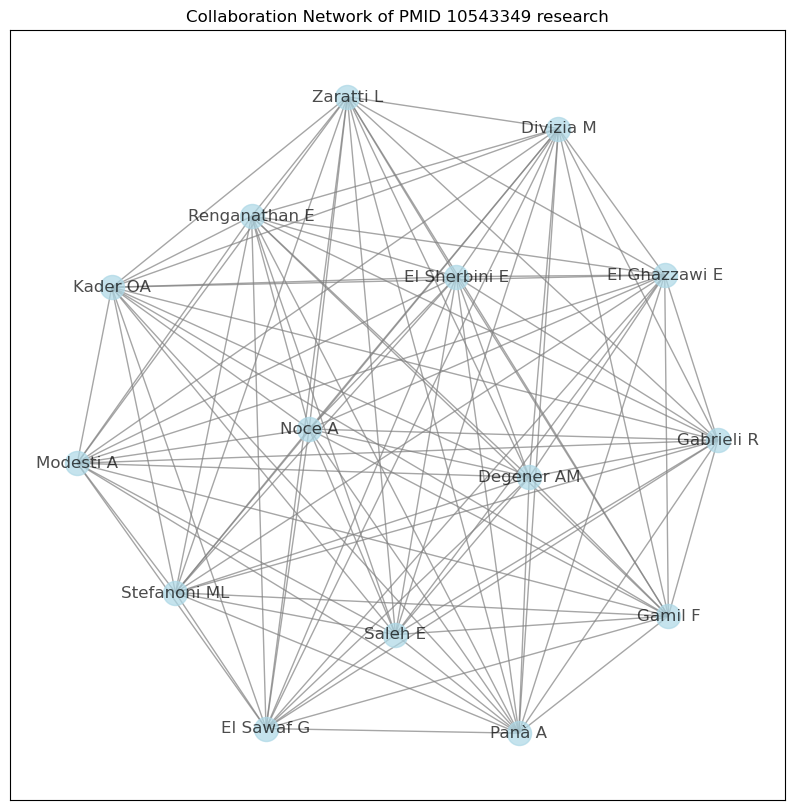

In [14]:
#Example like focusing on the particular pmid that who are the people collaborated for this particular research
pmid = 10543349

#Getting the values of tat particular PMID
pmid_data = Authors_Articles_Data[Authors_Articles_Data['PMID'] == pmid]

# Getting the Author names
Authors = pmid_data['Author Name_y'].unique().tolist()

# Creating an empty graph
graph = nx.Graph()

# Adding nodes for the authors
for author in Authors:
    graph.add_node(author)

# Adding edges between authors
for i in range(len(Authors)):
    for j in range(i + 1, len(Authors)):
        graph.add_edge(Authors[i], Authors[j])

# Plotting the network graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', alpha=0.7)
plt.title(f'Collaboration Network of PMID {pmid} research')
plt.show()

In [15]:
#creating a Dataset like who is working with whom
# Extracting the Author names 
authors_colloboration = Authors_Articles_Data[['Author Name_x', 'Author Name_y']]

# Filtering out missing values in author names
authors_colloboration = authors_colloboration.dropna()

# Creating a dictionary to store collaborations
collaborations = {}

# Iterating over each row in the DataFrame
for _, row in authors_colloboration.iterrows():
    author1 = row['Author Name_x']
    author2 = row['Author Name_y']
    
    # if two names are same just skipping
    if author1 == author2:
        continue
    
    #Storing 
    if author1 not in collaborations:
        collaborations[author1] = set()
    if author2 not in collaborations:
        collaborations[author2] = set()
        
    collaborations[author1].add(author2)
    collaborations[author2].add(author1)

# Printing the collaborations
print("Collaborations:")
for researcher, collaborators in collaborations.items():
    print(researcher, "->", collaborators)

Collaborations:
Divizia M -> {'Gabrieli R', 'Stefanoni ML', 'Saleh E', 'Gamil F', 'Zaratti L', 'Kader OA', 'Degener AM', 'El Sawaf G', 'Modesti A', 'Renganathan E', 'El Sherbini E', 'Noce A', 'El Ghazzawi E', 'Panà A'}
Gabrieli R -> {'Divizia M'}
Stefanoni ML -> {'Divizia M'}
Renganathan E -> {'Savioli L', 'Divizia M'}
El Ghazzawi E -> {'Divizia M'}
Kader OA -> {'Divizia M'}
Gamil F -> {'Divizia M', 'Habib M'}
El Sawaf G -> {'Divizia M'}
El Sherbini E -> {'Divizia M'}
Saleh E -> {'Divizia M', 'Rose MF'}
Degener AM -> {'Divizia M'}
Noce A -> {'Divizia M'}
Zaratti L -> {'Divizia M'}
Modesti A -> {'Divizia M'}
Panà A -> {'Divizia M'}
Hassan MM -> {'Shalaby MM', 'Gaafar M', 'Sultan M', 'el-Badrawy el-S', 'Sedighi A', 'Kamel FM', 'Gunning PT', 'Jung M', 'Mostafa N', 'Nassr AKh', 'Olaoye OO', 'Hegab MH', 'Gaber OA', 'Mattar MA', 'Merz A', 'Romier C', 'de Araujo ED', 'Ramos-Morales E', 'Keiser J', 'Soliman SZ', 'Afify HA', 'el-Motaim MH', 'Häberli C'}
Hegab MH -> {'Abdul-Fattah MM', 'Abdel-Fa

In [16]:
'''
#Crearting a network graph like who is working with whom

# Creating the null network graph
graph = nx.Graph()

# Adding nodes for all researchers
for researcher in collaborations.keys():
    graph.add_node(researcher)

# Adding the  edges for collaborations
for researcher, collaborators in collaborations.items():
    for collaborator in collaborators:
        graph.add_edge(researcher, collaborator)

# Plotting the network graph with interactive features
pos = nx.spring_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(graph, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, width=0.5, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')
plt.title("Collaboration Network")
plt.axis('off')

# Interacting plot
plt.interactive(True)
zoom = plt.axes([0.85, 0.05, 0.1, 0.075])
zoom_button = plt.Button(zoom, 'Zoom')

def on_zoom_clicked(event):
    ax = plt.gca()
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.draw()

zoom_button.on_clicked(on_zoom_clicked)

plt.show()
'''

'\n#Crearting a network graph like who is working with whom\n\n# Creating the null network graph\ngraph = nx.Graph()\n\n# Adding nodes for all researchers\nfor researcher in collaborations.keys():\n    graph.add_node(researcher)\n\n# Adding the  edges for collaborations\nfor researcher, collaborators in collaborations.items():\n    for collaborator in collaborators:\n        graph.add_edge(researcher, collaborator)\n\n# Plotting the network graph with interactive features\npos = nx.spring_layout(graph)\nplt.figure(figsize=(10, 10))\nnx.draw_networkx_nodes(graph, pos, node_size=200, node_color=\'skyblue\')\nnx.draw_networkx_edges(graph, pos, width=0.5, alpha=0.7, edge_color=\'gray\')\nnx.draw_networkx_labels(graph, pos, font_size=8, font_color=\'black\')\nplt.title("Collaboration Network")\nplt.axis(\'off\')\n\n# Interacting plot\nplt.interactive(True)\nzoom = plt.axes([0.85, 0.05, 0.1, 0.075])\nzoom_button = plt.Button(zoom, \'Zoom\')\n\ndef on_zoom_clicked(event):\n    ax = plt.gca()\